# Data Exploration
## 1.Reading the data 

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [120]:
df=pd.read_csv("titanic.csv")

In [58]:
df.shape

(891, 12)

In [59]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [60]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2.Variable Identification

In [61]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<b>object - categorical variables<br><br>
int64, float64 - continuous variables</b>
<br><br>
**Categorical variables** in the data are:
<ul>
    <li>Name</li>
    <li>Sex</li>
    <li>Ticket</li>
    <li>Cabin</li>
    <li>Embarked</li>
</ul>
<br>
<b>Continuous variables</b> are:
<ul>
    <li>PassengerId</li>
    <li>Survived</li>
    <li>Pclass</li>
    <li>Age</li>
    <li>SibSp</li>
    <li>Parch</li>
    <li>Fare</li>
</ul>
<br>
<b>Dependent variable</b> - Survived<br><br>

**Independent variable** - All the other variables, i.e, PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin and Embarked

## 3.Univariate Analysis
### a.Univariate analysis of continuous variables

In [62]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The describe function gives statistical information about the continuous variables.

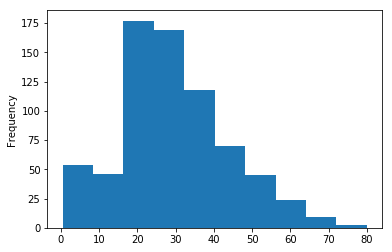

In [63]:
df['Age'].plot.hist()

Remark: The distribution is slightly left skewed.

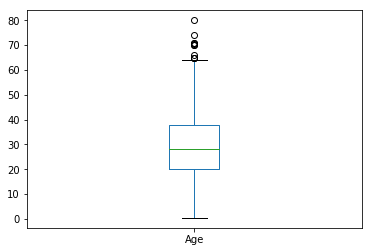

In [64]:
df['Age'].plot.box()

The black circles are the outliers in the data.

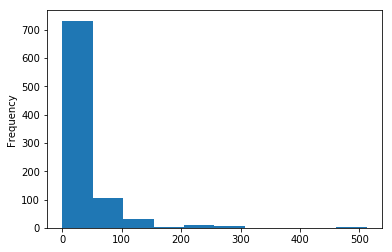

In [65]:
df['Fare'].plot.hist()

Remark: The distribution is extremely left skewed.

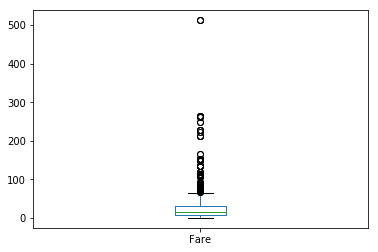

In [66]:
df['Fare'].plot.box()

It consists of many outliers.

### b.Univariate analysis of categorical variables

In [67]:
#creating frequency table for variable sex

df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [68]:
#create percentage from frequencies 

df['Sex'].value_counts()/len(df['Sex'])

male      0.647587
female    0.352413
Name: Sex, dtype: float64

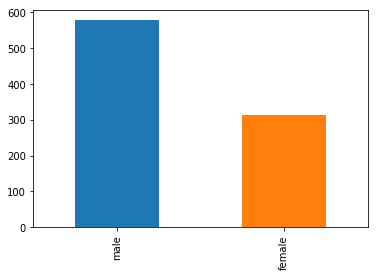

In [69]:
#create a bar plot for sex frequencies

df['Sex'].value_counts().plot.bar()

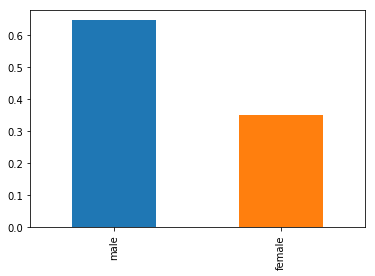

In [70]:
#creating a bar plot for percentage of males and females

(df['Sex'].value_counts()/len(df['Sex'])).plot.bar()

## 4.Bivariate Analysis
### a.Continuous - Continuous Bivariate Analysis
Does the fare of ticket increases with increase in age?

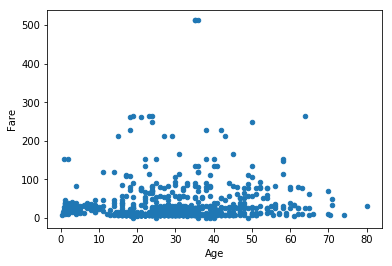

In [71]:
#creating a scatter plot of Age and Fare variable

df.plot.scatter('Age','Fare')

No visible relation between the variables.

In [72]:
# finding the correlation between all the continuous variables of the dataframe

df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [73]:
# finding correlation between 2 particular continuous variables

df['Age'].corr(df['Fare'])

0.09606669176903887

This is a very weak correlation. It can be safely said that there is no correlation between Age and Fare.

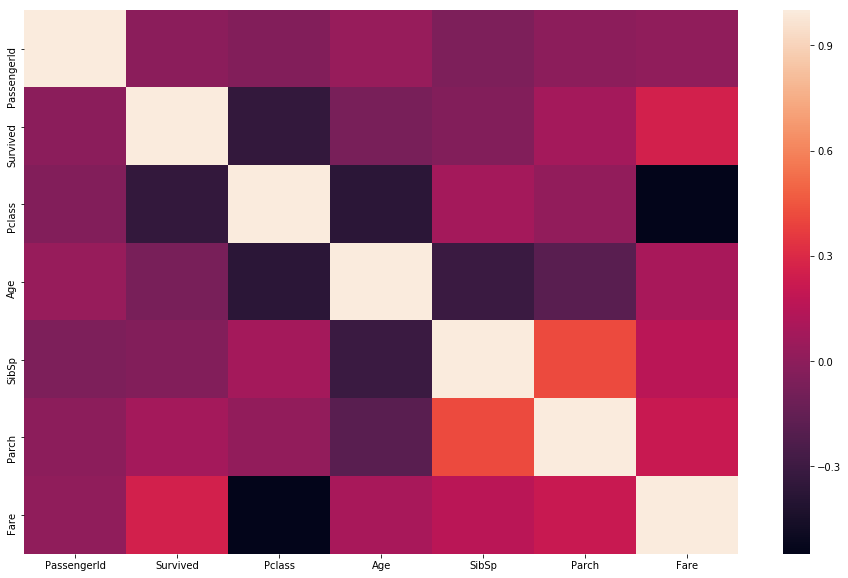

In [74]:
#plotting the heatmap for correlation

import seaborn as sns
plt.figure(figsize=(16,10))
sns.heatmap(df.corr())

Comparatively, Age and Survived have higher correlation. But still a value of 0.2 is weak only.<br>
So there is no relation we can find between the continuous variables.

### b.Categorical - Continuous Bivariate Analysis
Is the mean age of males different from the mean age of females?

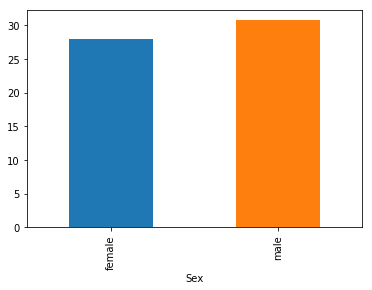

In [75]:
# plotting the mean of age of both male and female groups

df.groupby('Sex')['Age'].mean().plot.bar()

Although we can see that, there is a small difference in the means but to prove it and also find how much different it is we use the **Two Sample T Test**.<br>
It is used when we want to compare the means of 2 samples.

In [76]:
#importing the scipy library for ttest

from scipy.stats import ttest_ind

In [77]:
# male data

male=df[df['Sex']=='male']

In [78]:
# female data

female=df[df['Sex']=='female']

In [79]:
# performing the test be giving the 2 samples,i.e, age of males and females as arguments.

ttest_ind(male['Age'],female['Age'],nan_policy='omit')

Ttest_indResult(statistic=2.499206354920835, pvalue=0.012671296797014266)

Remark:Since p value is < 0.05, Null hypothesis can be neglected and it can be said that **the means are statistically different**.

### c.Categorical - Categorical Bivariate Analysis

Does gender have any effect on the survival rates?

In [80]:
# printing the two way table

pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


From the table, we have a rough idea that more females survived, but there are a lot of other things we need to take into consideration like the percentage of males and females that were on titanic, also, percentage of females and males that survived out of the total people that survived and such factors.<br>
The **Chi-square test** takes these factors into account.

In [81]:
# importing the function for chi square test

from scipy.stats import chi2_contingency

In [82]:
#performing chi square test

chi2_contingency(pd.crosstab(df['Sex'],df['Survived']))

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

Here p <0.05, hence there is a statistically significant difference,i.e, gender has an effect on the survival rates.

## 5. Treating missing values

In [83]:
#identifying missing values in the dataframe

df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [84]:
# count of missing values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The continuous variable Age has 177 missing values and the categorical variables, Cabin has 687 missing values and Embarked has 2 missing values.

### Different methods to deal with missing values
#### 1.Deletion
##### a.Row - wise deletion

In [85]:
#dropping all rows where there are any missing values

df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [86]:
df.dropna().isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [87]:
#dropping all the rows where alll the entries are missing

df.dropna(how='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [88]:
df.dropna(how='all').shape

(891, 12)

##### b.Column - wise deletion

In [89]:
#dropping columns with any missing values 

df.dropna(axis=1).shape

(891, 9)

In [90]:
df.dropna(axis=1, how='all').shape

(891, 12)

#### 2.Imputation
Continuous variables are imputed using:<br>
<ol>
    <li>Mean</li>
    <li>Median</li>
    <li>Regression model</li>
</ol>
Categorical variables are imputed using:<br>
<ol>
    <li>Mode</li>
    <li>Classification model</li>
</ol>

In [91]:
#filling all the missing values in a dataframe with 0

df.fillna(0)

#inplace=true parameter inside fillna will modify the dataframe!

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C


In [92]:
#impute values in a particular column with a partcular value

df['Age'].fillna(0)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       0.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      0.0
18     31.0
19      0.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      0.0
27     19.0
28      0.0
29      0.0
       ... 
861    21.0
862    48.0
863     0.0
864    24.0
865    42.0
866    27.0
867    31.0
868     0.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     0.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Below we impute the continuous variable Age with it's mean!

In [93]:
#impute values in a particular column with mean

df['Age'].fillna(df['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

## 6.Detection and Treatment of Outliers

### a. Univariate Outliers

#### Detection

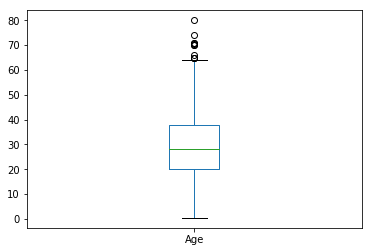

In [111]:
df['Age'].plot.box()

#### Treatment

In [121]:
#Replacing outlier in age with the mean age value

import numpy as np
df.loc[df['Age']>65, 'Age']=np.mean(df['Age'])

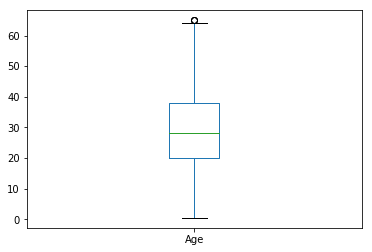

In [122]:
df['Age'].plot.box()

Many of the ouliers are now removed!

### b.Bivariate Outliers

#### Detection

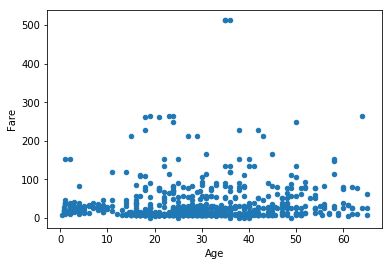

In [42]:
df.plot.scatter('Age', 'Fare')

Although there is no linear relationship here, we can say, there are two values greater then 300. Hence they can be considered as outliers.

#### Treatment

In [44]:
# Removing outlier from the dateset

df=df[df['Fare']<300]
df.shape

(888, 12)

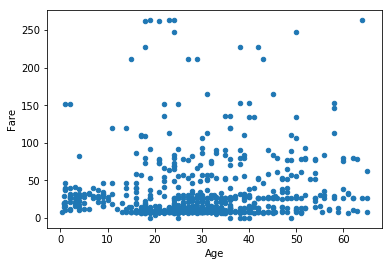

In [45]:
df.plot.scatter('Age', 'Fare')

Now all the values are less than 300.